In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [46]:
data_train = pd.read_csv("train.csv")#('/content/drive/My Drive/train.csv')

In [47]:
data_train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [48]:
data_train.sample()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
1171,VID_20330,1,6828,6,0,2,2014-12-11,PT51S,G


In [49]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [50]:
data_train.shape

(14999, 9)

In [51]:
category = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"] = data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [52]:
data_train = data_train[data_train.views!='F']
data_train = data_train[data_train.likes!='F']
data_train = data_train[data_train.dislikes!='F']
data_train = data_train[data_train.comment!='F']

In [53]:
data_train["adview"] = pd.to_numeric(data_train["adview"])
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["comment"] = pd.to_numeric(data_train["comment"])

In [54]:
data_train.dtypes

vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [55]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [56]:
from sklearn.preprocessing import LabelEncoder
data_train["vidid"] = LabelEncoder().fit_transform(data_train["vidid"])
data_train["published"] = LabelEncoder().fit_transform(data_train["published"])
data_train["duration"] = LabelEncoder().fit_transform(data_train["duration"])

In [57]:
data_train.dtypes

vidid        int32
adview       int64
views        int64
likes        int64
dislikes     int64
comment      int64
published    int32
duration     int32
category     int64
dtype: object

In [58]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [59]:
#converting the duration time values in seconds
import time
import datetime
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

final_time=time.apply(func_sec)
data_train["duration"]=final_time
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


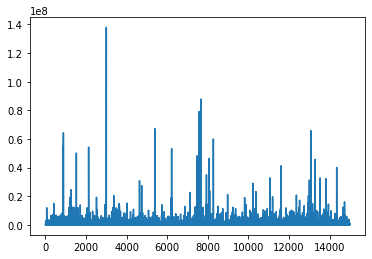

In [60]:
#visualizing the processed data
plt.plot(data_train["views"])
plt.show()

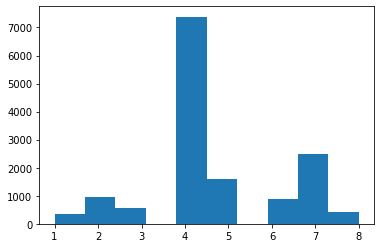

In [61]:
plt.hist(data_train["category"])
plt.show()

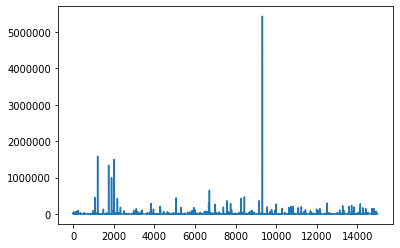

In [62]:
plt.plot(data_train["adview"])
plt.show()

In [63]:
#removing the outliers i.e the adviews above 2000000
data_train = data_train[data_train["adview"] < 2000000]

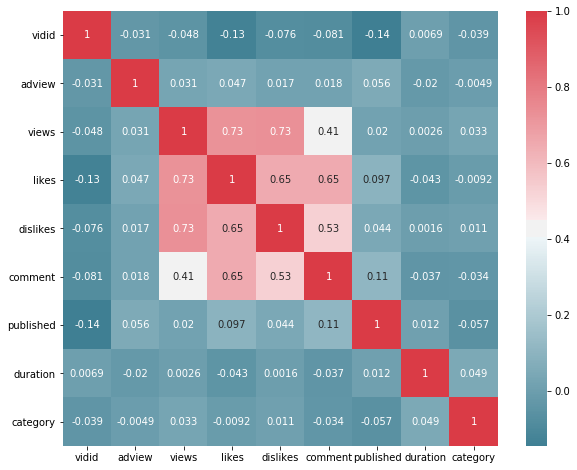

In [64]:
import seaborn as sns #seaborn mainly useful for heatmaps
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [65]:
#splitting the data into training and test data with ratio 80:20

In [66]:
#copying the adview coulumn from data_train to a target dataframe named 'data_target'
data_target = pd.DataFrame(data=data_train.iloc[:,1].values,columns=["target"])
data_target.head()

,target
0,40
1,2
2,1
3,6
4,1


In [67]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [68]:
#removing the vidid and adview coulumns to update dataset to only input data to be given to ML model 
data_train = data_train.drop(["vidid","adview"],axis=1)

In [69]:
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [70]:
#training and testing data split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, data_target, test_size=0.2, random_state=42 )

In [71]:
X_train.shape

(11708, 7)

In [72]:
X_test.shape

(2928, 7)

In [73]:
y_train.shape

(11708, 1)

In [74]:
y_test.shape

(2928, 1)

In [75]:
#normalizing the input data to reduce the data items to the range 0 to 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [76]:
X_train.mean()

0.1739096800320488

In [77]:
X_test.mean()

0.17614792076344343

In [78]:
#creating a function to calculate errors for each each model
from sklearn import metrics 
def get_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, prediction))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test, prediction))

In [79]:
#implementing different ML models

#Linear Regression
from sklearn import linear_model
LR = linear_model.LinearRegression()
LR.fit(X_train, y_train)
get_error(X_test, y_test, LR)

Mean Absolute Error: 3707.3780058245347
Mean Squared Error: 835663131.1210337


In [80]:
#Support vector regressor
from sklearn.svm import SVR
S_V_R = SVR()
S_V_R.fit(X_train, y_train)
get_error(X_test, y_test, S_V_R)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1696.9438599505638
Mean Squared Error: 833685776.029172


In [81]:
#Decision trees
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
get_error(X_test, y_test, DT)

Mean Absolute Error: 2541.614412568306
Mean Squared Error: 870220483.7339481


In [82]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_sample_split = 15
min_sample_leaf = 2
RFR = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_sample_split)
RFR.fit(X_train, y_train)
get_error(X_test, y_test, RFR)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3328.873064369158
Mean Squared Error: 617571782.1732091


In [83]:
#selecting final ML model as 'Decision Tree'


In [84]:
""""#trying out with artificial neural networks
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential"""

'"#trying out with artificial neural networks\nimport tensorflow as tf\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.models import Sequential'

In [85]:
"""ann = Sequential(
[Dense(6, activation="relu",
input_shape = X_train.shape[1:]),
Dense(6,activation = "relu"),
Dense(1)]
)
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.mean_squared_error
ann.compile(optimizer = optimizer,loss = loss,metrics = ["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
get_error(X_test,y_test,ann)"""

'ann = Sequential(\n[Dense(6, activation="relu",\ninput_shape = X_train.shape[1:]),\nDense(6,activation = "relu"),\nDense(1)]\n)\noptimizer = tf.keras.optimizers.Adam()\nloss = tf.keras.losses.mean_squared_error\nann.compile(optimizer = optimizer,loss = loss,metrics = ["mean_squared_error"])\nhistory=ann.fit(X_train,y_train,epochs=100)\nann.summary()\nget_error(X_test,y_test,ann)'

In [86]:
#saving and then loading the SVR model to file using joblib 
import joblib
joblib_file = "joblib_Svr_model.pkl"
joblib.dump(S_V_R , joblib_file)
S_V_R_model = joblib.load(joblib_file)
S_V_R_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
score = S_V_R_model.score(X_test, y_test)
print((score) )

-0.0034615214550512974


In [88]:
Ypredict = S_V_R_model.predict(X_test)

In [89]:
for i in Ypredict:
    print(i)

2.833705706489072
1.5602473804033081
1.8352784820159254
2.573688140505046
1.5548816780009582
2.1848842248560896
1.809779897444934
1.810451262764829
2.4227551857286995
2.801711473845158
2.746898231395507
3.1231552560850426
2.214045736579168
3.94669382902208
1.9559571528482702
1.861607751235696
1.7787858237885301
2.08113363157771
1.8745462796030048
2.7551995855734166
1.6578272359266184
2.0712497475975886
3.827525299604715
1.9656387865958247
1.4646993379261484
3.2406592994815697
3.46621399366041
1.4271466047799586
2.0337405813920704
2.151179355443404
2.235645952244059
2.2157018861653413
2.0246520752206445
2.2863034400251205
1.7706165536256873
3.181391091287189
1.472970223371739
2.36146647971006
2.511246920314089
1.5864308954901007
1.5513260285323236
2.0975480720655337
2.418317840850247
1.4972707575236428
1.4930678852069357
1.4410680416478927
3.1377737535834402
4.05275084124922
2.235320654959703
2.1530116842833102
1.4637778871885145
1.5929242413034457
2.1953333733842584
3.2173710060039262


1.8371978801826523
2.342571011832538
2.0307480852165436
2.0289608637751297
2.0931413046146004
2.7167097092604964
1.4380312862029978
1.800721696741273
3.2712275899191017
1.5964304050434053
2.404431982300367
3.5050387285104314
3.2859275844287312
2.295925311012377
2.5502989757603496
2.384013360661034
4.992155179546787
1.6225352736031224
2.1073019526877568
1.736498795855336
3.2209931634750446
2.255116496884707
2.198671712795705
2.258769942121726
3.7026242432302388
4.507694642356138
2.4175680629997034
3.4499542579887783
3.440759298634137
2.077992335801619
6.728094085592247
1.9221600819679903
1.760131670783208
2.573677838230283
2.188863155131149
1.7928536285944703
1.563667134024374
3.9944124749300345
1.5020410994632143
1.3967720278445213
1.6513717766396232
3.999837341166912
2.129973660875118
1.549066563230253
1.9830507915148137
2.255478229376357
1.9623473945712198
3.574258423845097
1.4546895515756813
4.024152434839145
1.879416731739446
1.131525347648075
1.8638192677105108
1.71487680781664
1.

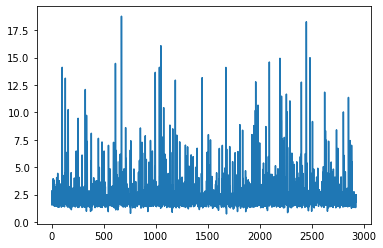

In [90]:
plt.plot(Ypredict)

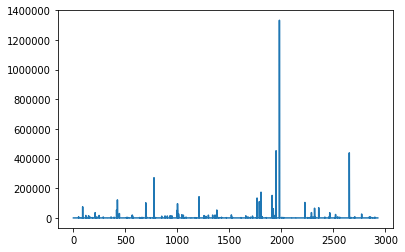

In [91]:
expected = pd.DataFrame(y_test).to_numpy()
plt.plot(expected)

In [92]:
print(metrics.mean_absolute_error(expected,Ypredict))

1696.9438599505638


In [95]:
#from sklearn.metrics import accuracy_score
#print(accuracy_score(expected,Ypredict))

Project Submission using test.csv dataset to make predictions on adviews:






In [96]:
data_test = pd.read_csv("test.csv")

In [97]:
data_test.dtypes

vidid        object
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [98]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [99]:
category1 = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"] = data_test["category"].map(category1)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [100]:
data_test = data_test[data_test.views!='F']
data_test = data_test[data_test.likes!='F']
data_test = data_test[data_test.dislikes!='F']
data_test = data_test[data_test.comment!='F']

In [101]:
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
data_test["comment"] = pd.to_numeric(data_test["comment"])

In [102]:
data_test.dtypes

vidid        object
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [103]:
from sklearn.preprocessing import LabelEncoder
data_test["vidid"] = LabelEncoder().fit_transform(data_test["vidid"])
data_test["published"] = LabelEncoder().fit_transform(data_test["published"])
data_test["duration"] = LabelEncoder().fit_transform(data_test["duration"])

In [104]:
data_test.dtypes

vidid        int32
views        int64
likes        int64
dislikes     int64
comment      int64
published    int32
duration     int32
category     int64
dtype: object

In [105]:
#converting the duration time values in seconds
import time
import datetime
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

final_time=time.apply(func_sec)
data_test["duration"]=final_time
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [106]:
data_test = data_test.drop(["vidid"], axis=1)

In [107]:
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [108]:
testing = data_test

In [109]:
F_predict = S_V_R_model.predict(testing)

In [110]:
data_test["adviews"] = F_predict
data_test.head()

,views,likes,dislikes,comment,published,duration,category,adviews
0,440238,6153,218,1377,2053,449,2,3.548512
1,1040132,8171,340,1047,1825,389,6,3.548512
2,28534,31,11,1,1009,2274,4,3.548512
3,1316715,2284,250,274,116,595,7,3.548512
4,1893173,2519,225,116,1892,188,2,3.548512


In [112]:
#final.to_csv('Predictions_Submission.csv',index=False)